# Python for Social Science

<img src="../figures/PySocs_banner.png" width="50%" align="left">

## Visualization Principles

Visualization helps you explore and better understand your data. However, it should not be used simply for its own sake or as a substitute for proper statistical analysis. By following certain principles like those outlined below, you can prevent misuse of visualization. 

1. **Question first** — what do you want to learn? distribution, relationship, comparison, or composition?
2. **Start simple** — axis, points, bars. Add complexity only when needed.
3. **Show uncertainty** — error bars, confidence intervals, violin/boxplots.
4. **Avoid chartjunk** — keep color and shapes meaningful.
5. **Use facets** to show grouping and conditioning rather than cramming info into one plot.

## Visualizing using `Seaborn`

**Matplotlib** is the foundational plotting library in Python, offering fine-grained control over every element of a figure (axes, ticks, lines, colors, etc.), which makes it powerful but sometimes verbose. **Seaborn** is built on top of Matplotlib, providing a high-level interface for creating statistically meaningful and aesthetically pleasing plots with minimal code. Matplotlib offers complete control, while Seaborn delivers beautiful, informative visuals quickly—ideal for data exploration and analysis.

| Feature                       | **Matplotlib**                                    | **Seaborn**                                                             |
| ----------------------------- | ------------------------------------------------- | ----------------------------------------------------------------------- |
| **Level of abstraction**      | Low-level: you control each plot element manually | High-level: automatic aesthetics and statistical summaries              |
| **Ease of use**               | Requires more code to style plots                 | One-liners for common plot types                                        |
| **Default aesthetics**        | Plain (good for full customization)               | Styled with attractive defaults (color palettes, gridlines)             |
| **Statistical functionality** | Must compute summaries manually                   | Built-in aggregation, confidence intervals, regression fits, etc.       |
| **Integration with pandas**   | Works, but less automatic                         | Native DataFrame awareness (automatic variable mapping by column names) |


### Wapper Functions in `Seaborn`

In Seaborn, **wrapper functions** are high-level interfaces that “wrap around” lower-level plotting functions.

They make it easy to create complex multi-plot visualizations (like facets or grids) while keeping consistent styling and layout:

- which type of plot to draw,
- how to map variables (x, y, hue, etc.),
- and how to arrange multiple subplots.

![](../figures/seaborn_org.png)

Source: [Seaborn](https://seaborn.pydata.org/tutorial/function_overview.html)

| Wrapper Function  | Lower-Level Functions It Wraps                                               | Typical Use                                            | Faceting?             | Example                                                         |
| ----------------- | ---------------------------------------------------------------------------- | ------------------------------------------------------ | --------------------- | --------------------------------------------------------------- |
| **`relplot()`**   | `scatterplot()`, `lineplot()`                                                | Relationships between variables (scatter or line)      | ✅ Yes (`row`/`col`)   | `sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")` |
| **`catplot()`**   | `stripplot()`, `swarmplot()`, `boxplot()`, `violinplot()`, `barplot()`, etc. | Categorical comparisons                                | ✅ Yes                 | `sns.catplot(data=tips, x="day", y="tip", kind="box")`          |
| **`displot()`**   | `histplot()`, `kdeplot()`, `ecdfplot()`                                      | Distributions of one or two variables                  | ✅ Yes                 | `sns.displot(data=tips, x="total_bill", kde=True)`              |
| **`lmplot()`**    | `regplot()`                                                                  | Linear models (regression + scatter)                   | ✅ Yes                 | `sns.lmplot(data=tips, x="total_bill", y="tip", hue="sex")`     |
| **`pairplot()`**  | Multiple `scatterplot()` and `histplot()`                                    | Pairwise relationships in a dataset                    | ❌ No (grid form only) | `sns.pairplot(data=iris, hue="species")`                        |
| **`jointplot()`** | `scatterplot()` + `histplot()` or `kdeplot()`                                | Relationship between two variables with marginal plots | ❌ No                  | `sns.jointplot(data=tips, x="total_bill", y="tip", kind="kde")` |


### Plot-wide Visual Themes

Seaborn offers both high-level and low-level functions to adjust the overall appearance of a plot, including its **style** (such as gridlines, axis spines, and tick visibility), **context** (like fonts and line widths), and the **color** palette. 

#### Setting theme - `sns.set_style`

For example, you can choose from the following background themes:

| Style         | Description                                              |
| ------------- | -------------------------------------------------------- |
| `"white"`     | Minimal, no grid                                         |
| `"dark"`      | Dark background, no grid                                 |
| `"whitegrid"` | White background with gridlines (default for most plots) |
| `"darkgrid"`  | Dark background with gridlines                           |
| `"ticks"`     | White background with ticks emphasized                   |


```python
# Setting style
sns.set_style("whitegrid") # Default
```

#### Setting context - `sns.set_context`

These adjust scaling for presentation contexts (fonts, line widths, etc.):

| Context      | Use case                  |
| ------------ | ------------------------- |
| `"paper"`    | For small plots in papers |
| `"notebook"` | Default                   |
| `"talk"`     | Slightly larger           |
| `"poster"`   | Largest elements          |

```python
# Setting context
sns.set_context("notebook") # Default
```

#### Setting color palette - `sns.set_palette`

Seaborn provides several built-in palettes.
They fall into qualitative, sequential, and diverging categories:

| Type        | Purpose                                  | Example palettes                                                      |
| ----------- | ---------------------------------------- | --------------------------------------------------------------------- |
| Qualitative | For categorical hue                      | `"deep"`, `"muted"`, `"pastel"`, `"bright"`, `"dark"`, `"colorblind"` |
| Sequential  | For numeric hue (low → high)             | `"Blues"`, `"Greens"`, `"Purples"`, `"rocket"`, `"mako"`, `"crest"`   |
| Diverging   | For data that diverges around a midpoint | `"coolwarm"`, `"vlag"`, `"icefire"`, `"RdBu_r"`                       |


```python
# Setting palette
sns.set_palette("deep") # Default
```

✅ **Note** that once you set a new style, context, etc., the new settings persist across plots within the current Python session.

Seaborn also provides a high-level function with which you can can set all three settings:

In [2]:
# Setting style, context, and palette all at once
sns.set_theme(style="whitegrid", 
              context="notebook",
              palette="deep")

### Setup and load datasets

We will explore Seaborn’s main plot types using a variety of real-world datasets included with the library and more. When useful, we’ll also demonstrate how to create similar visualizations with Matplotlib.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [4]:
tips = sns.load_dataset("tips")          # restaurant tipping data
penguins = sns.load_dataset("penguins")  # Palmer penguins (species, bill, flipper, sex)
flights = sns.load_dataset("flights")    # airline passengers over time
iris = sns.load_dataset("iris")          # classic iris dataset
planets = sns.load_dataset("planets")    # solar system planets

In [5]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


We will also use `bicycle`, daily total of bike counts conducted in NYC.

In [6]:
bicycle = pd.read_csv("../data/nyc_bicycle_crossing.csv")
bicycle.head()

,date,day,month,max_temp,min_temp,precipitation,Brooklyn,Manhattan,Williamsburg,Queensboro
0,4/1/17,Saturday,April,46.0,37.0,0,606,1446,1915,1430
1,4/2/17,Sunday,April,62.1,41.0,0,2021,3943,4207,2862
2,4/3/17,Monday,April,63.0,50.0,0.03,2470,4988,5178,3689
3,4/4/17,Tuesday,April,51.1,46.0,1.18,723,1913,2279,1666
4,4/5/17,Wednesday,April,63.0,46.0,0,2807,5276,5711,4197


Each bridge has its own column. We can use the `DataFrame.melt()` method to transform the data from a wide to a long format. The following code creates a new DataFrame in long format and renames the variables.

In [7]:
crossings = bicycle.melt(
    id_vars=["day", "date", "month", "min_temp", "max_temp", "precipitation"],
    value_vars=[
        "Brooklyn", "Manhattan",
        "Williamsburg", "Queensboro"
    ],
    var_name="Bridge",
    value_name="Crossings",
).rename(columns={"day": "Day", "date": "Date", "month": "Month"})

crossings.head()

,Day,Date,Month,min_temp,max_temp,precipitation,Bridge,Crossings
0,Saturday,4/1/17,April,37.0,46.0,0,Brooklyn,606
1,Sunday,4/2/17,April,41.0,62.1,0,Brooklyn,2021
2,Monday,4/3/17,April,50.0,63.0,0.03,Brooklyn,2470
3,Tuesday,4/4/17,April,46.0,51.1,1.18,Brooklyn,723
4,Wednesday,4/5/17,April,46.0,63.0,0,Brooklyn,2807


### Dataset - `tips`

The `tips` dataset contains information about restaurant bills and tips collected from a waitstaff in a U.S. restaurant, typically used to study tipping behavior and factors that may influence it.

In [ ]:
tips.head()

### Bar Charts

Bar charts are among the most commonly used tools for visualizing categorical data, as they allow you to compare the sizes of different categories or the magnitudes of summary statistics.

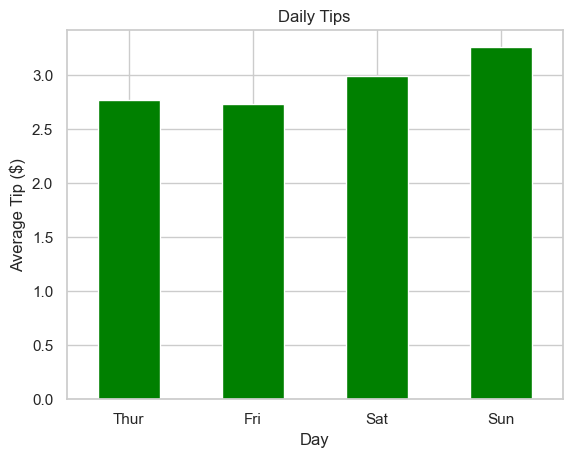

In [8]:
# Matplotlib

average_daily_tip = tips.groupby("day", observed=True)["tip"].mean()

average_daily_tip.plot(kind="bar", 
                       xlabel="Day", 
                       ylabel="Average Tip ($)", 
                       title="Daily Tips", 
                       color="green",
                       rot=0);

With Matplotlib, you must calculate the means yourself before plotting, as it is a low-level plotting library that only visualizes the data provided to it.

Seaborn, on the other hand, is built on top of Matplotlib and offers built-in statistical estimation features.

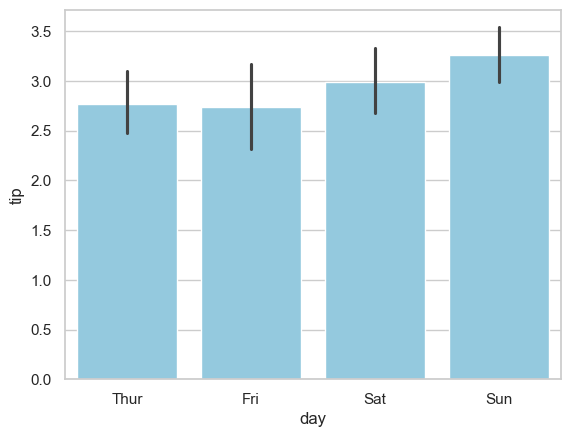

In [10]:
# Seaborn

sns.barplot(data=tips, 
            x="day", 
            y="tip", 
            estimator=np.mean, 
            color="skyblue");

Seaborn computes the mean (`estimator=np.mean`), draws the bars, and even adds confidence intervals for you. (Note: You can suppress the confidence intervals by setting `errorbar=None`.)

However, Seaborn functions like `sns.barplot()` and `sns.scatterplot()` are built on Matplotlib and return a Matplotlib Axes object. You can set titles, labels, and other customizations using standard Matplotlib commands.

In [ ]:
# Seaborn + title and labels

sns.barplot(data=tips, 
            x="day", 
            y="tip", 
            estimator=np.mean, 
            errorbar=None,
            color="green")

plt.title("Daily Tips")
plt.xlabel("Day")
plt.ylabel("Average Tip ($)");

### Estimator Functions

You can use any callable functions for the estimator, e.g.,

| Function                | Description            | Module        |
| ----------------------- | ---------------------- | ------------- |
| `np.mean`               | Mean                   | `numpy`       |
| `np.median`             | Median                 | `numpy`       |
| `np.sum`                | Sum                    | `numpy`       |
| `np.min`                | Minimum                | `numpy`       |
| `np.max`                | Maximum                | `numpy`       |
| `np.std`                | Standard deviation     | `numpy`       |
| `len`                   | Count of values        | built-in      |
| `scipy.stats.trim_mean` | Trimmed mean           | `scipy.stats` |
| `lambda x: ...`         | Custom inline function | built-in      |


### Practice Exercise 1

Using the `bicycle` DataFrame, create a bar chart for monthly **total** bike counts crossing the Brooklyin Bridge (`Brooklyn`). Label the plot and axes as follows:

- title: "Total Monthly Bicycle Crossings (Brooklyn Bridge)"
- xlabel: "Month"
- ylabel: "Number of Bicycles"

In [12]:
bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           91 non-null     object 
 1   day            91 non-null     object 
 2   month          91 non-null     object 
 3   max_temp       91 non-null     float64
 4   min_temp       91 non-null     float64
 5   precipitation  91 non-null     object 
 6   Brooklyn       91 non-null     int64  
 7   Manhattan      91 non-null     int64  
 8   Williamsburg   91 non-null     int64  
 9   Queensboro     91 non-null     int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 7.2+ KB


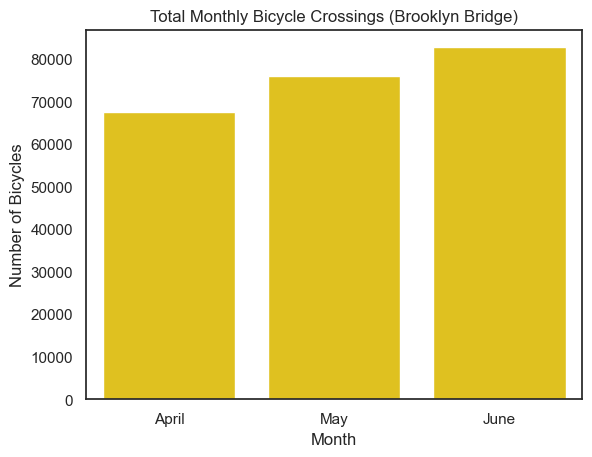

In [15]:
# YOUR CODE HERE


### Grouped Bar Charts

A grouped bar chart (also called a clustered bar chart) is used to visualize comparisons across multiple categories and their sub-categories.

Suppose we want to graph the monthly bike crossings for different bridges. This would be cumbersome with the current wide-format data (`bicycle`), but straightforward using the long-format data we created earlier (`crossings`).

In [ ]:
ax = sns.barplot(data=crossings, 
                 x="Month",
                 y="Crossings",
                 hue="Bridge",
                 estimator=np.sum,
                 errorbar=None)

ax.set_title("Total Monthly Bicycle Crossings by Bridge")
ax.set_xlabel("Month")
ax.set_ylabel("Number of Bicycles");

### Practice Exercise 2

**Grouped Bar Chart**: Create a grouped bar chart showing **the total number** of bicycle crossings by bridge and day of week using Seaborn.

**Instructions**:

1. Use the `crossings` DataFrame, which contains data on daily bicycle counts for several NYC bridges. Relevant columns include:
    - Bridge — bridge name (e.g., Brooklyn, Manhattan, Williamsburg, Queensboro)
    - Day — day of the week (e.g., Monday, Tuesday, …)
    - Crossings — number of bicycles counted

2. Use Seaborn’s barplot() function to:
    - Set the x-axis to "Bridge"
    - Set the y-axis to "Crossings"
    - Use the hue aesthetic for "Day" to create grouped bars within each bridge
    - Set `estimator=np.sum` so the chart shows total crossings (not averages)
    - Disable error bars with `errorbar=None`

3. Add appropriate labels and a title using Matplotlib methods:
    - Title: "Total Bicycle Crossings by Day and Bridge"
    - X-axis label: "Bridge"
    - Y-axis label: "Number of Bicycles"

In [ ]:
# YOUR CODE HERE


### Histograms in Seaborn

A **histogram** is a common tool for visualizing the distribution of a numeric variable. It displays the frequency with which values fall into continuous intervals (bins), providing a clear summary of how data is spread or concentrated across a range.

In **Seaborn**, histograms are generated using the `sns.histplot()` function. This combines the ease of Matplotlib’s `plt.hist()` with Seaborn’s appealing defaults and features like kernel density estimation (KDE), automatic bin sizing, and customizable color palettes.

Here, we'll calculate the percentage of tip relative to the total bill.

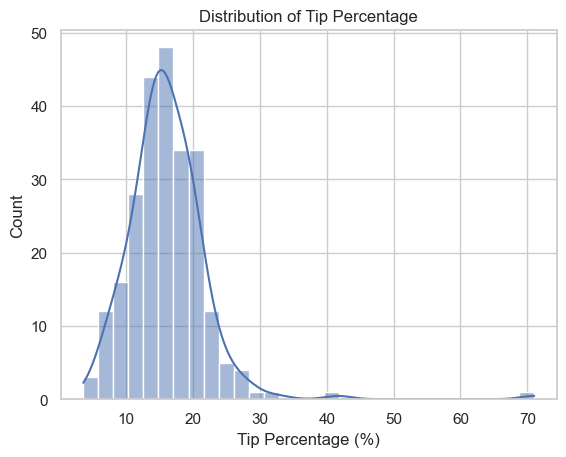

In [17]:
# Compute tip percentage
tips["tip_pct"] = tips["tip"] / tips["total_bill"] * 100

sns.histplot(
    data=tips,          # dataset or array-like
    x=tips["tip_pct"],  # numeric variable
    bins=30,            # number of bins
    kde=True,           # add kernel density curve
    hue=None,           # subgroup by category
    multiple='layer',   # overlay or stack distributions
    element='bars',     # 'bars', 'step', or 'poly'
)

plt.xlabel("Tip Percentage (%)")
plt.title("Distribution of Tip Percentage");

The **KDE** curve helps visualize the underlying shape (e.g., whether most tips cluster around 15–20%). 

### Comparing Tipping Behavior Across Groups

When analyzing data, it's important not only to understand the overall distribution of a variable (such as tip percentage), but also **how that distribution varies across different groups**.

In this example, we examine whether **tipping behavior varies by gender** (`sex`) **and meal time** (`time`) using multi-panel histograms.

For example, do male and female customers tip differently at lunch compared to dinner? Faceted (multi-panel) histograms provide an immediate visual comparison—each subgroup has its own panel, making it much easier and clearer to identify differences than overlaying all data in a single, cluttered plot.

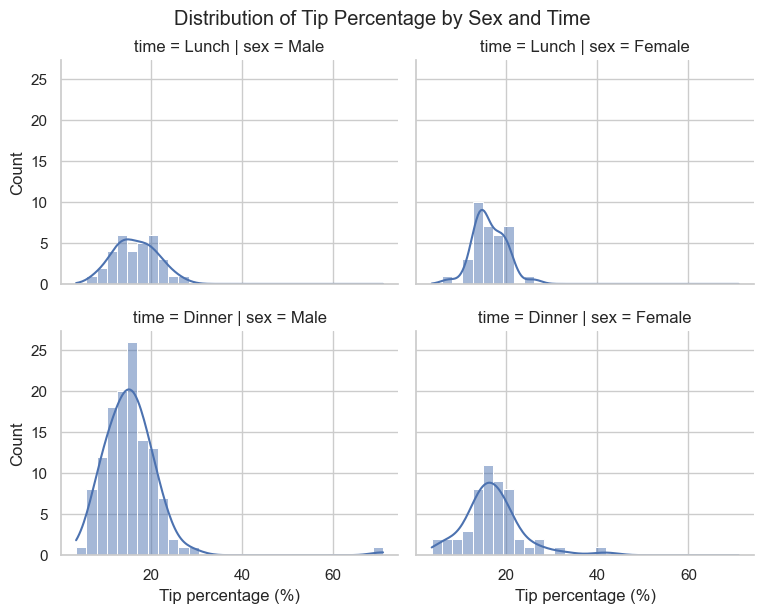

In [18]:
# Multi-panel histogram by sex (columns) and time (rows)
g = sns.displot(
    data=tips,
    x="tip_pct",
    kde=True,
    bins=30,
    col="sex",        # separate columns by gender
    row="time",       # separate rows by time (Lunch/Dinner)
    height=3,         # height of each subplot
    aspect=1.3,       # aspect ratio (width/height)
)

# Set common labels and title
g.set_axis_labels("Tip percentage (%)", "Count")
g.fig.suptitle("Distribution of Tip Percentage by Sex and Time", y=1.02);

Faceting with `col` and `row`

- `col="sex"` → creates separate columns for male and female customers.
- `row="time"` → creates separate rows for lunch and dinner.

Together, these form a **2×2 grid** of histograms — one for each combination of `sex` and `time`.

This structure makes it easy to compare how the shape and spread of tip percentages differ between groups.

Seaborn’s `sns.displot()` is a **figure-level** function, and what it returns is not an **Axes** object (like `ax = sns.histplot()`), but a `FacetGrid` object.

Let’s confirm that:

In [23]:
print(type(g))

<class 'seaborn.axisgrid.FacetGrid'>


So why this matters? `sns.displot()` builds a grid of subplots (one per combination of row and col) and wraps them in a `FacetGrid`.

In [27]:
g.axes        # 2D array of Axes objects

array([[<Axes: title={'center': 'time = Lunch | sex = Male'}, ylabel='Count'>,
        <Axes: title={'center': 'time = Lunch | sex = Female'}>],
       [<Axes: title={'center': 'time = Dinner | sex = Male'}, xlabel='Tip percentage (%)', ylabel='Count'>,
        <Axes: title={'center': 'time = Dinner | sex = Female'}, xlabel='Tip percentage (%)'>]],
      dtype=object)

In [28]:
g.axes[0, 0]  # top-left subplot

<Axes: title={'center': 'time = Lunch | sex = Male'}, ylabel='Count'>

In [29]:
print(type(g.axes[0, 0]))

<class 'matplotlib.axes._axes.Axes'>


### Comparing Male and Female Tipping Distributions by Meal Time

When examining tipping data, you might want to compare how male and female customers tip at lunch versus dinner without splitting them into separate panels. By using the `hue` parameter, you can assign different colors to each group within a single histogram, making visual comparisons easier.

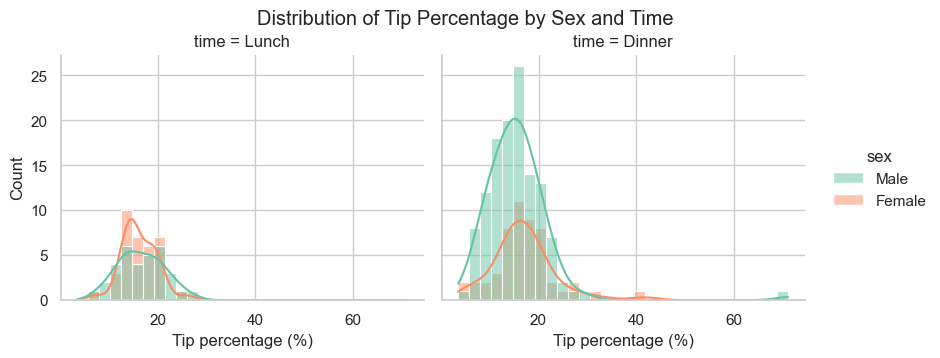

In [30]:
# Multi-panel histogram by time, colored by sex
g = sns.displot(
    data=tips,
    x="tip_pct",
    hue="sex",        # color-code male/female within each panel
    col="time",       # create separate panels for Lunch and Dinner
    kde=True,         # overlay KDE curve
    bins=30,          # number of histogram bins
    height=3.5,       # panel height
    aspect=1.2,       # aspect ratio (width)
    palette="Set2",   # use a colorblind-friendly palette
    alpha=0.5         # slight transparency to show overlap
)

# Add axis labels and a common title
g.set_axis_labels("Tip percentage (%)", "Count")
g.fig.suptitle("Distribution of Tip Percentage by Sex and Time", y=1.02);

### Simplifying Comparisons with Only Densities

A KDE-only version is especially useful when:
- You want to compare distribution shapes (e.g., skewness, spread, peaks).
- The dataset is large enough that individual bar counts are less informative.
- You want a cleaner visual summary suitable for presentations or papers.

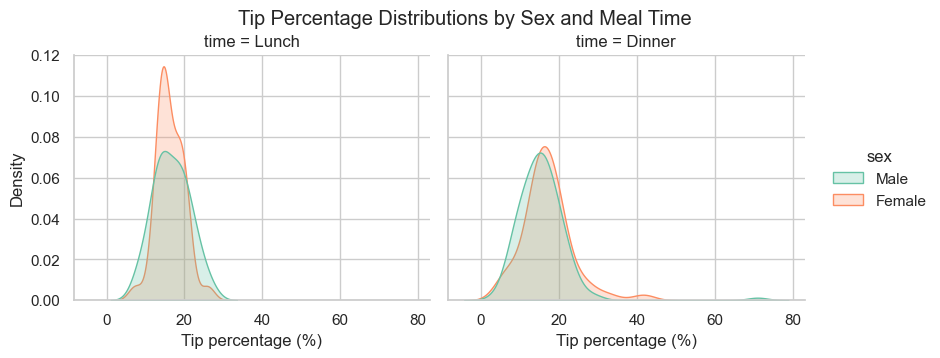

In [31]:
# KDE-only multi-panel plot by meal time and sex
g = sns.displot(
    data=tips,
    x="tip_pct",
    hue="sex",          # color-coded by sex
    col="time",         # separate panels for Lunch and Dinner
    kind="kde",         # show only kernel density curves
    fill=True,          # fill under the curve for readability
    common_norm=False,  # normalize each group independently
    height=3.5,
    aspect=1.2,
    palette="Set2"
)

# Axis labels and common title
g.set_axis_labels("Tip percentage (%)", "Density")
g.fig.suptitle("Tip Percentage Distributions by Sex and Meal Time", y=1.02);


**Explanation of Key Features**

1. `kind="kde"`
    - Switches from histograms to KDE (Kernel Density Estimate) plots.
    - Shows a smoothed estimate of the probability density for each group.

2. `fill=True`
    - Adds a filled area under each curve, improving visual distinction.

3. `common_norm=False`
    - Ensures each subgroup (male/female) is normalized independently, so their peak heights reflect relative density within each group.

### Practice Exercise 3

**Comparing Penguin Body Mass Distributions**:
Create a multi-panel plot showing how penguin body mass varies by `species` and `sex` using Seaborn’s `displot()` function.

**Instructions**:

1. Use `sns.displot()` to plot the distribution of `body_mass_g`.
2. Set:
    - `col="species"` to create one panel for each penguin species.
    - `hue="sex"` to color male and female penguins differently within each species.
    - `kind="kde"` to show smoothed distributions (not histograms).
    - `fill=True` to fill the area under each curve.
3. Add meaningful axis labels and a common title.
    - `xlabel` to "Body Mass (g)".
    - `ylabel` to "Density"
    - `fig.suptitle` to "Distribution of Penguin Body Mass by Sex and Species"
4. Make sure each group (male/female) is normalized independently using `common_norm=False`.

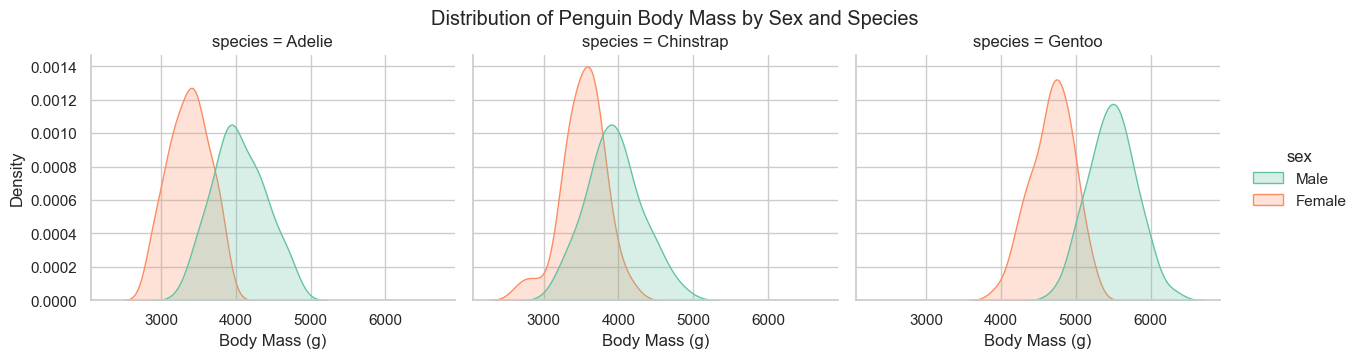

In [32]:
# YOUR CODE HERE


### Boxplots in Seaborn

A boxplot, also known as a box-and-whisker plot, is a standard method for visualizing the distribution of a numerical variable across one or more groups. It displays key statistics and highlights potential outliers in a concise, easy-to-read format. The box itself extends from the first quartile (Q1) to the third quartile (Q3), representing the middle 50% of the data. Whiskers extend from the box to indicate the data range within 1.5 times the interquartile range (IQR) from the quartiles. Data points outside this range are usually plotted individually as outliers.

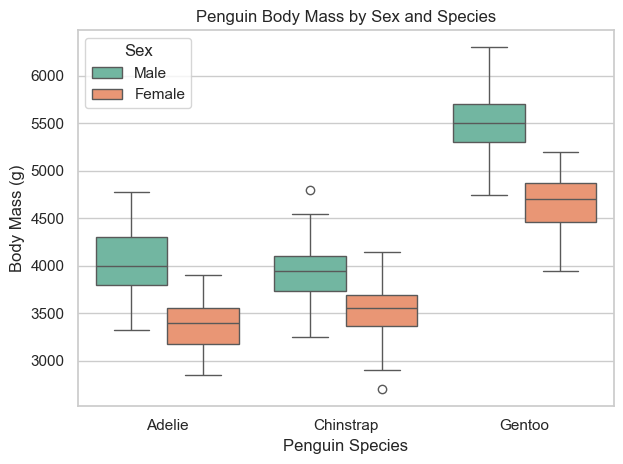

In [37]:
# Grouped boxplot

ax = sns.boxplot(
    data=penguins,
    x="species",
    y="body_mass_g",
    hue="sex",
    palette="Set2"
    #palette={"Male": "skyblue", "Female": "lightpink"}
)

# Customize labels and title
ax.set_xlabel("Penguin Species")
ax.set_ylabel("Body Mass (g)")
ax.set_title("Penguin Body Mass by Sex and Species")
ax.legend(title="Sex", loc="upper left")

plt.tight_layout();

Here's another example using the `tips` dataset, which displays the tip percentage by day of the week and gender.

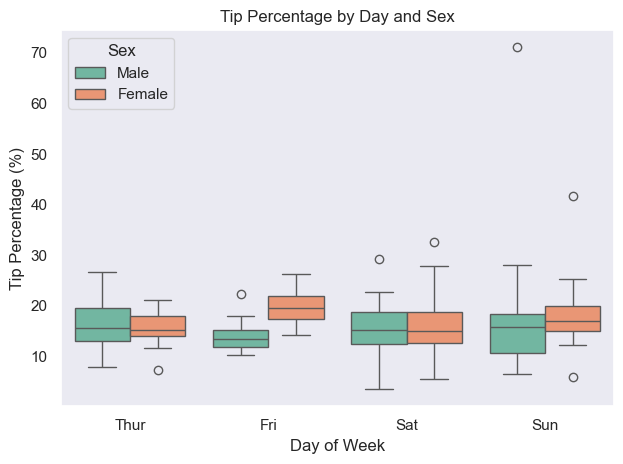

In [40]:
with sns.axes_style("dark"):
    sns.boxplot(
        data=tips,
        x="day",      # main categorical axis
        y="tip_pct",  # numeric variable
        hue="sex",    # subgroup within each day
        #palette={"Male": "skyblue", "Female": "lightpink"}
        palette="Set2"
    )

    plt.title("Tip Percentage by Day and Sex")
    plt.xlabel("Day of Week")
    plt.ylabel("Tip Percentage (%)")
    plt.legend(title="Sex", loc="upper left")
    plt.tight_layout()

### Multi-Panel Boxplots

Multiple boxplots placed side by side allow for an easy visual comparison of the central tendency, variability, and distribution shape across different groups. By examining how the boxes and whiskers differ in position, width, and symmetry, you can quickly identify which groups have higher or lower typical values, which are more variable, and whether any groups show evidence of skewed or asymmetric distributions.

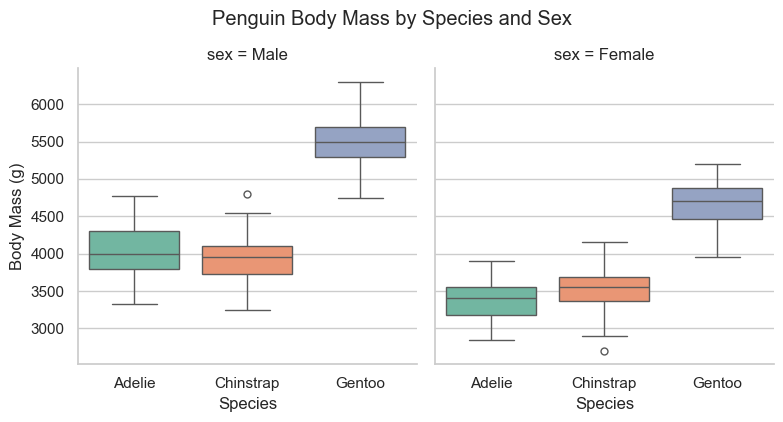

In [51]:
sns.set_style("whitegrid")
#sns.set_theme(style="whitegrid")

# Multi-panel boxplot: panels by sex
g = sns.catplot(
    data=penguins,
    x="species",       # species on x-axis
    y="body_mass_g",   # numeric variable
    col="sex",         # separate panels for male and female
    kind="box",
    hue="species",
    palette="Set2",    # consistent color palette
    height=4,
    aspect=1
)

# Customize axis labels and main title
g.set_axis_labels("Species", "Body Mass (g)")
g.fig.suptitle("Penguin Body Mass by Species and Sex", y=1.05);


### Horizontal Boxplot with Overlaid Observations

A boxplot with overlaid observations offers both clarity and detail—it summarizes distributions while also preserving the data’s granularity.

Seaborn makes this easy: you can overlay individual observations (e.g., with `sns.stripplot()`) on top of a boxplot.

- `x="distance"`: the numeric variable plotted along the **x-axis**, making the boxplots horizontal.
- `whis=[0, 100]`: extends the whiskers to include the entire data range—from minimum to maximum—rather than the default 1.5×IQR, ensuring no points are marked as outliers.

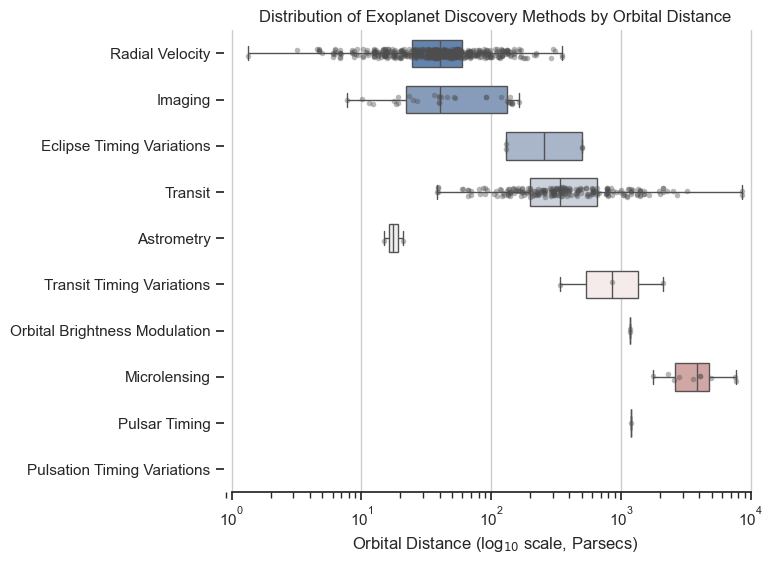

In [45]:
# Source: seaborn.pydata.org/examples

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(
    planets, x="distance", y="method", hue="method",
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
ax = sns.stripplot(planets, x="distance", y="method", size=4, color=".3", alpha=0.4)

# Tweak the visual presentation
ax.set(
    xlabel=r"Orbital Distance (log$_{10}$ scale, Parsecs)",
    title="Distribution of Exoplanet Discovery Methods by Orbital Distance"
)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### Scatterplots in Seaborn

Scatterplots are frequently used to illustrate the relationships between variables — for example, how total bill (`total_bill`), party size (`size`), gender (`sex`), smoking status (`smoker`), day of the week (`day`), and time of day (`time`) might affect the tip amount (`tip`).

Seaborn has the following aesthetic feasures to encode variables:

- `hue` assigns colors to categories, 
- `style` changes marker shapes, and 
- `size` scales the points. 

We will use them to encode the following three variables:

- `hue` → `sex`
- `style` → `smoker`
- `size` → `size`

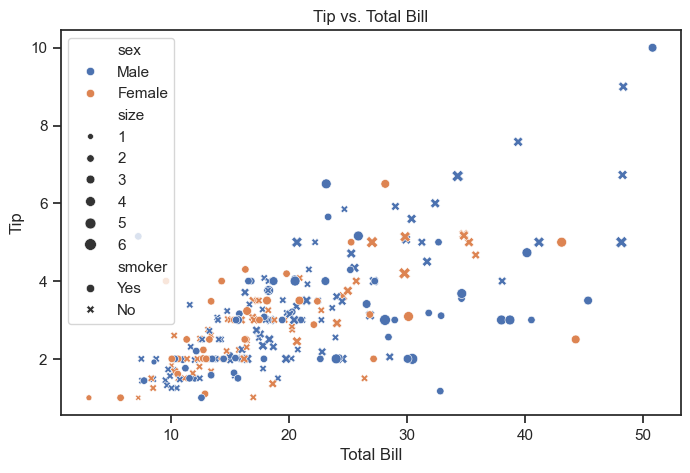

In [46]:
# Set figure size
plt.figure(figsize=(8, 5))  # width=8 inches, height=5 inches

ax = sns.scatterplot(data=tips, 
                x="total_bill", y="tip",
                hue="sex",
                style="smoker",
                size="size")

ax.set(xlabel="Total Bill",
       ylabel="Tip",
       title="Tip vs. Total Bill");

#plt.title("Tip vs. Total Bill");

### Overlaying Regression Lines on a Scatterplot

While scatterplots are excellent for visualizing patterns, the overall trend can sometimes be difficult to discern, especially when there is variability or noise in the data.

Adding a regression line (or trend line) on top of a scatterplot provides a summary of the relationship between the variables:
- Highlights the direction (positive, negative, or none) of the relationship.
- Helps to identify linear trends or patterns.
- Makes it easier to compare different groups if multiple regression lines are plotted by category.

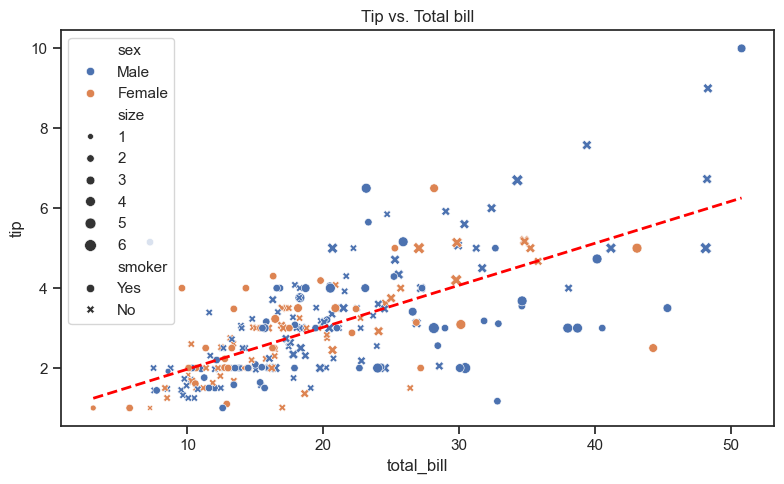

In [47]:
# Set figure size
plt.figure(figsize=(8, 5))  # width=8 inches, height=5 inches

sns.scatterplot(data=tips, 
                x="total_bill", y="tip",
                hue="sex",
                style="smoker",
                size="size")

sns.regplot(data=tips,
            x="total_bill", y="tip",
            scatter=False,
            ci=None,
            line_kws={"lw": 2, "color": "red", "ls": "--"})

plt.title("Tip vs. Total bill")

plt.tight_layout();

### Practice Exercise 2

Using the `bicycle` DataFrame, create a scatterplot of minimum vs. maximum temperature. Apply the `hue` and `style` aesthetic parameters to "month".

- title: "Minimum vs. Maximum Temperature"
- xlabel: "Minimum Temperature"
- ylabel: "Maximum Temperature"

Use `sns.regplot(..., scatter=False)` overlays a linear regression line summarizing the trend between the bariables without adding extra points.

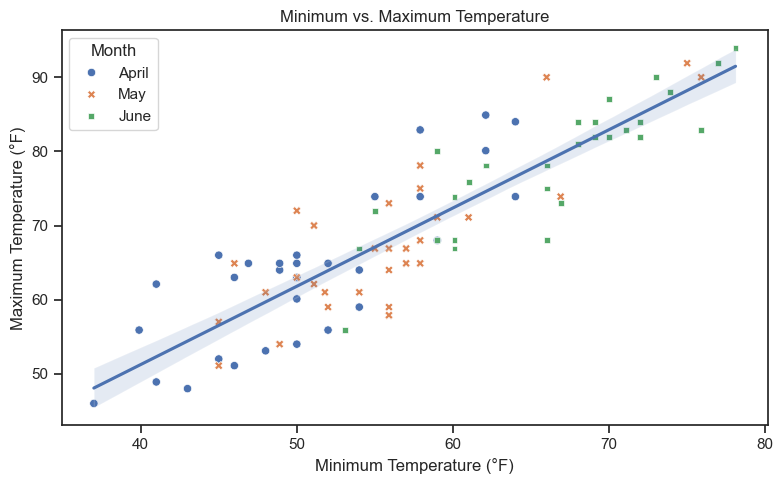

In [48]:
# Set figure size
plt.figure(figsize=(8, 5))  # width=8 inches, height=5 inches

# YOUR CODE HERE


### Practice Exercise 3

Using the `crossings` DataFrame, create a scatter plot of average temperature, (`min_temp` + `max_temp`)/2, and the number of crossings. Apply the `hue` and `style` aesthetic parameters to "Bridge".

- title: "Bike Crossings vs Average Temperature by Bridge"
- xlabel: "Average Temperature (°C)"
- ylabel: "Number of Crossings"

In [49]:
crossings.head()

,Day,Date,Month,min_temp,max_temp,precipitation,Bridge,Crossings
0,Saturday,4/1/17,April,37.0,46.0,0,Brooklyn,606
1,Sunday,4/2/17,April,41.0,62.1,0,Brooklyn,2021
2,Monday,4/3/17,April,50.0,63.0,0.03,Brooklyn,2470
3,Tuesday,4/4/17,April,46.0,51.1,1.18,Brooklyn,723
4,Wednesday,4/5/17,April,46.0,63.0,0,Brooklyn,2807


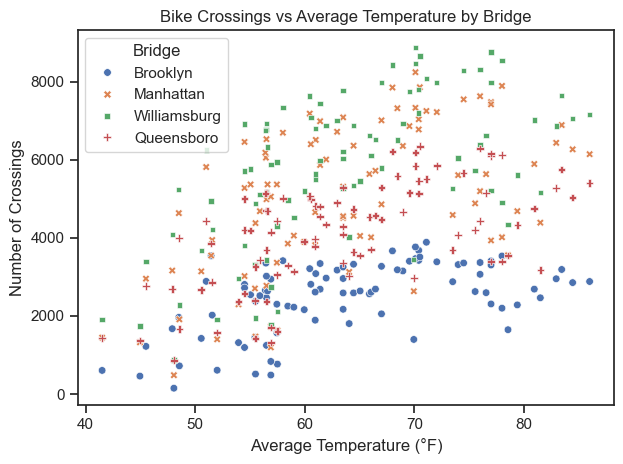

In [50]:
# YOUR CODE HERE

# Compute average temperature


### Overlaying Multiple Regression Lines

Seaborn's `lmplot()` automatically draws a separate regression line per `hue` category (here, per bridge), while still creating the scatter points. This automatically fits separate regression lines for each bridge.

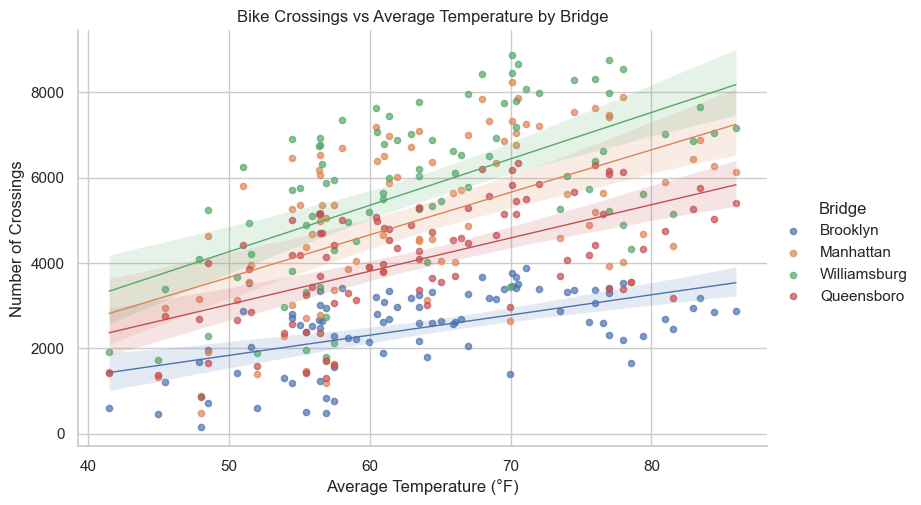

In [52]:
sns.set_theme(style="whitegrid")

# Plot with regression lines per Bridge
sns.lmplot(
    data=crossings,
    x="avg_temp",
    y="Crossings",
    hue="Bridge",
    scatter_kws={"alpha": 0.7, "s": 20},
    line_kws={"lw": 1},
    height=5,
    aspect=1.6
)

plt.title("Bike Crossings vs Average Temperature by Bridge")
plt.xlabel("Average Temperature (°F)")
plt.ylabel("Number of Crossings");

### Manually Adding Multiple Regression Lines

If you need fine-grained control (for example, different regression models or subset filtering), you can manually loop through bridges with `sns.regplot()`.

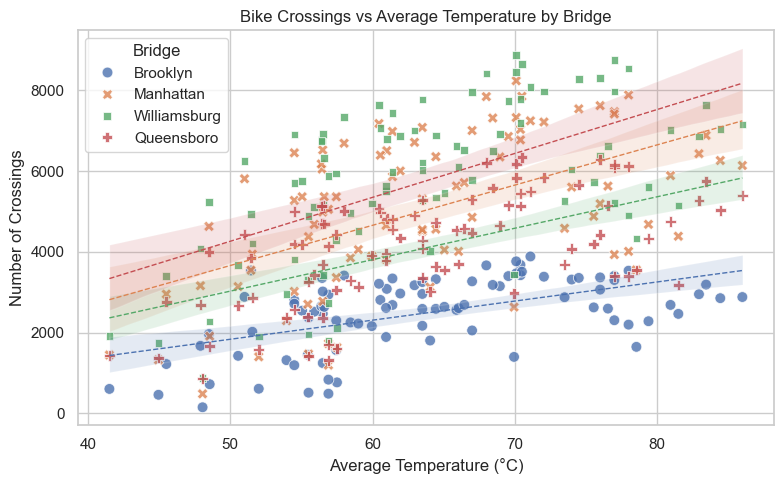

In [56]:
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter points
ax = sns.scatterplot(
    data=crossings,
    x="avg_temp",
    y="Crossings",
    hue="Bridge",
    style="Bridge",
    alpha=0.8,
    s=60
)

# Add separate regression lines
for bridge, subset in crossings.groupby("Bridge"):
    sns.regplot(
        data=subset,
        x="avg_temp",
        y="Crossings",
        scatter=False,     # only the line
        line_kws={"lw": 1, "ls": "--"},
        #label=f"{bridge} (fit)",
        ax=ax
    )

ax.set_title("Bike Crossings vs Average Temperature by Bridge")
ax.set_xlabel("Average Temperature (°C)")
ax.set_ylabel("Number of Crossings")
ax.legend(title="Bridge", loc="upper left")

plt.tight_layout();

Summary of regression model options in `sns.regplot()`

| Model Type      | Key Argument    | Description                        |
| --------------- | --------------- | ---------------------------------- |
| Linear          | *(default)*     | Fits a straight line               |
| Polynomial      | `order=n`       | Fits an n-th degree polynomial     |
| LOWESS (smooth) | `lowess=True`   | Local regression, no fixed formula |
| Logistic        | `logistic=True` | For binary outcomes                |


The following projects local smoothing lines using `LOWESS=True`. Also try `order=2` instead.

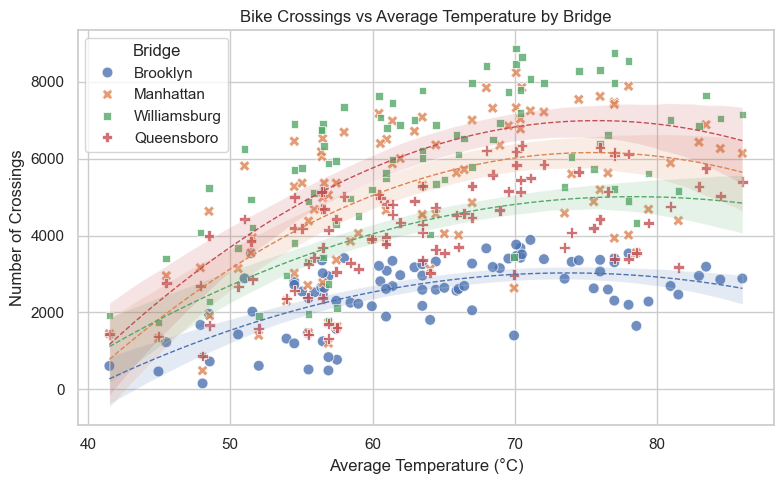

In [58]:
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter points
ax = sns.scatterplot(
    data=crossings,
    x="avg_temp",
    y="Crossings",
    hue="Bridge",
    style="Bridge",
    alpha=0.8,
    s=60
)

# Add separate regression lines
for bridge, subset in crossings.groupby("Bridge"):
    sns.regplot(
        data=subset,
        x="avg_temp",
        y="Crossings",
        lowess=True,
        scatter=False,     # only the line
        line_kws={"lw": 1, "ls": "--"},
        #label=f"{bridge} (fit)",
        ax=ax
    )

ax.set_title("Bike Crossings vs Average Temperature by Bridge")
ax.set_xlabel("Average Temperature (°C)")
ax.set_ylabel("Number of Crossings")
ax.legend(title="Bridge", loc="upper left")

plt.tight_layout();

### Scatterplot with Continuous Hues and Sizes

The following example is adapted from [seaborn gallery](https://seaborn.pydata.org/examples/). It uses the `planets` dataset to illustrate a complex example of a scatterplot with continuous **hues** and **sizes**. The `planets` dataset in Seaborn is a built-in dataset of exoplanets (planets outside our solar system). 

| Column           | Description                                                                                     |
| ---------------- | ----------------------------------------------------------------------------------------------- |
| `method`         | The **detection method** used to discover the planet (e.g., radial velocity, transit, imaging). |
| `number`         | Number of planets discovered in the **same system** (for multi-planet systems).                 |
| `orbital_period` | Time it takes the planet to complete **one orbit** around its star, in **days**.                |
| `mass`           | Mass of the planet, usually in **Jupiter masses**. Some values may be missing (`NaN`).          |
| `distance`       | Distance from Earth to the star system, in **parsecs** (~3.26 light-years per parsec).          |
| `year`           | **Discovery year** of the planet.                                                               |


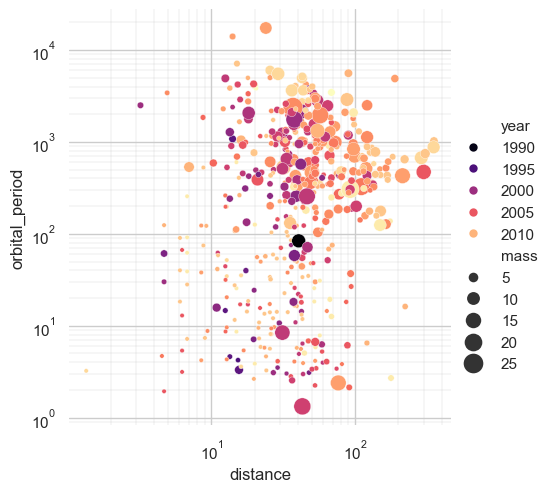

In [59]:
# Source: seaborn.pydata.org/examples

sns.set_theme(style="whitegrid")

cmap = sns.color_palette("magma", as_cmap=True)

g = sns.relplot(
    data=planets,
    x="distance", 
    y="orbital_period",
    hue="year", 
    size="mass",    # scales marker size by the planet's mass
    palette=cmap, 
    sizes=(10, 200) # defines the minimum and maximum marker sizes
)
g.set(xscale="log", yscale="log")             # sets both axes to logarithmic scale
g.ax.xaxis.grid(True, "minor", linewidth=.25) # thin lines
g.ax.yaxis.grid(True, "minor", linewidth=.25) # thin lines
g.set_axis_labels(xlabel=r"Distance (log$_{10}$ scale, parsecs)", 
                  ylabel=r"Orbital Period (log$_{10}$ scale, days)")
g.despine(left=True, bottom=True);            # removes the left and bottom axes lines


### Multi-Panel Scatterplots in Seaborn

Too much encoding in a single plot can make visualizations distracting. 

Multi-panel plots (also called facet plots) allow you to split a dataset into subsets and create multiple subplots to compare patterns across categories. They are useful for exploring interactions between variables or comparing trends across groups.

**Key Concepts**

1. Figure-level functions
    - Seaborn functions like `relplot()`, `catplot()`, and `lmplot()` are figure-level.
    - They can automatically create multiple subplots (facets) based on a categorical variable.
    -Unlike `scatterplot` or `barplot` (axes-level), these return a `FacetGrid` object, not a single `Axes`.

2. Faceting variables
    - col → creates columns of subplots
    - row → creates rows of subplots
    - hue → color-codes points in each facet
    - style → changes marker shapes or line styles in each facet

3. Advantages
    - Compare the same relationship across categories without overplotting.
    - Maintain consistent axes, scales, and aesthetics across panels.
    - Combine with aggregation, regression lines, or scatter plots for deeper insights.

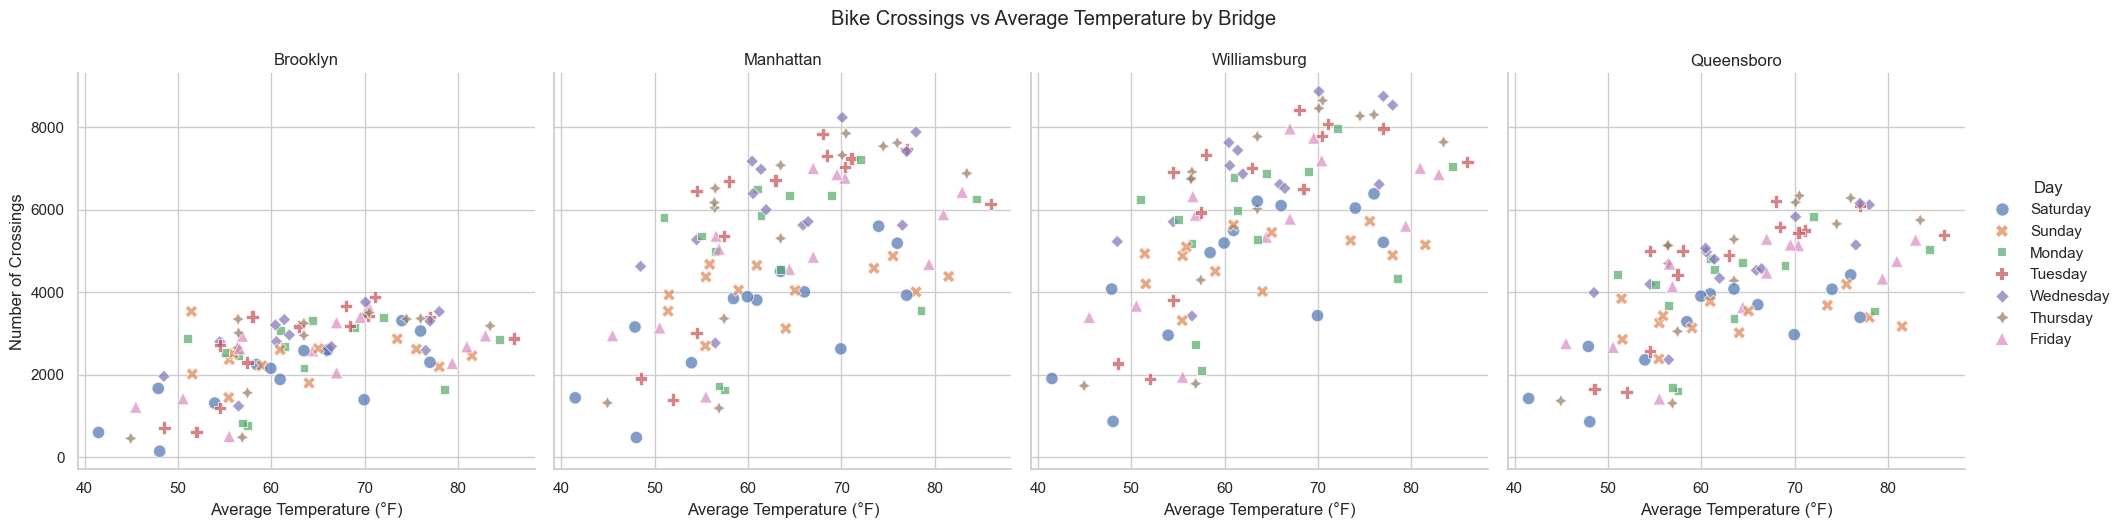

In [61]:
# Multi-panel scatter plot by Bridge
g = sns.relplot(
    data=crossings,
    x="avg_temp",
    y="Crossings",
    col="Bridge",        # one panel per bridge
    hue="Day",           # color by Day
    style="Day",         # optional, different markers per Day
    alpha=0.7,
    s=80,
    #col_wrap=2           # wrap into 2 columns if you want multiple rows
)

# Customize axis labels and title
g.set_axis_labels("Average Temperature (°F)", "Number of Crossings")
g.set_titles("{col_name}")   # panel titles = bridge names
g.fig.suptitle("Bike Crossings vs Average Temperature by Bridge", y=1.05);


### Practice Exercise 4

Multi-Panel Scatter Plot of Tips by Day
Objective

Using `tips` dataset, visualize the relationship between `total_bill` and `tip` using Seaborn’s `relplot()`, exploring how the relationship varies by day of the week, gender, and smoker status.

1. Create a multi-panel scatter plot:
    - Map total_bill → x-axis, tip → y-axis
    - Facet by day (col="day")
    - Color points by sex (hue="sex")
    - Use different markers for smoker (style="smoker")
    - Set marker size to 80 and alpha to 0.7

2. Customize the plot:
    - Set x-axis label to "Total Bill"
    - Set y-axis label to "Tip"
    - Display the day of the week as panel titles
    - Add a figure-level title: "Tip vs. Total Bill by Day of Week"


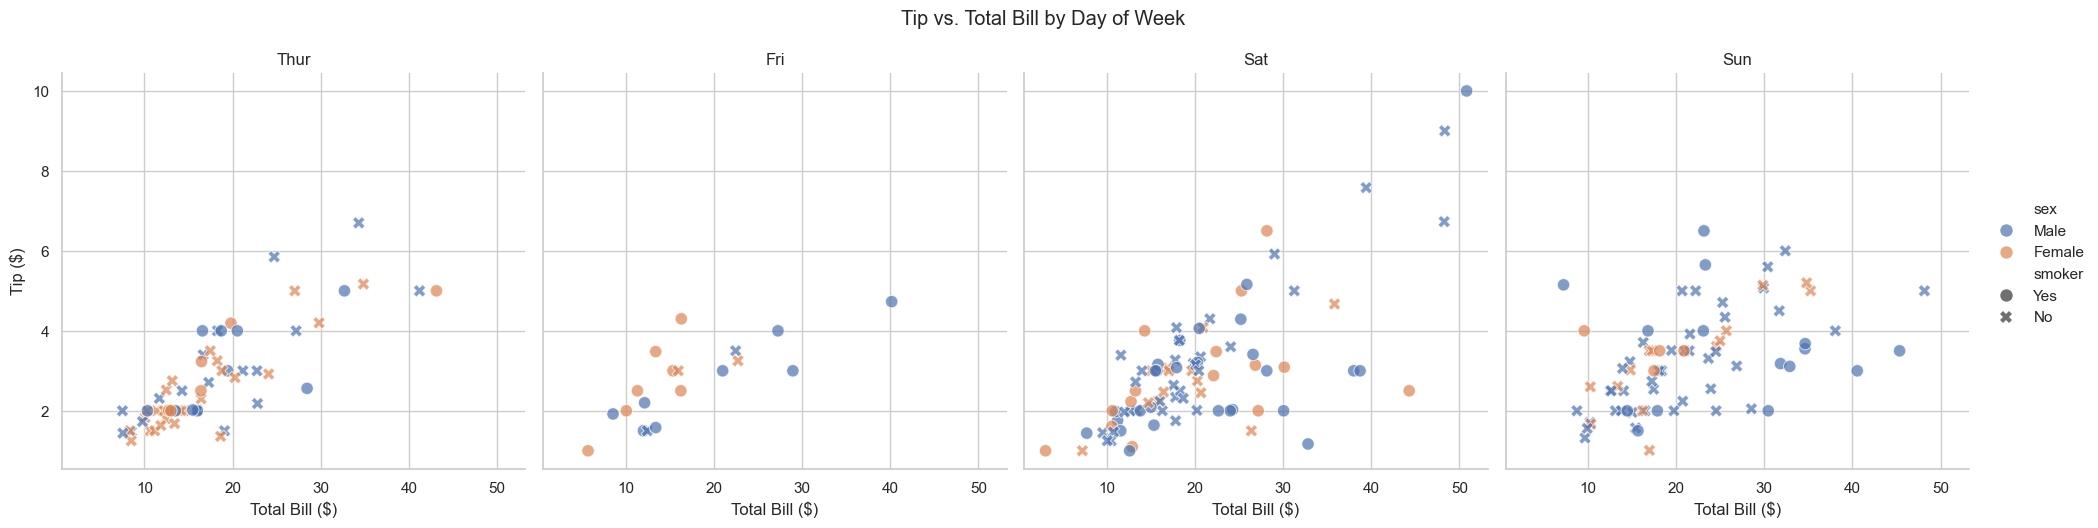

In [62]:
# Multi-panel scatter plot by day
g = sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="day",        # one panel per bridge
    hue="sex",        # color by Day
    style="smoker",   # optional, different markers per Day
    alpha=0.7,
    s=80
    #scatter_kws={"alpha": 0.7, "s": 80}
)

# Customize axis labels and title
g.set_axis_labels("Total Bill ($)", "Tip ($)")
g.set_titles("{col_name}")   # panel titles = bridge names
g.fig.suptitle("Tip vs. Total Bill by Day of Week", y=1.05);

### Bivariate Plot with Marginal Distributions

Seaborn's jointplot is a powerful function for visualizing the relationship between two variables while adding marginal axes that show the univariate distribution of each one separately. It creates a figure with a central bivariate plot and marginal univariate plots.

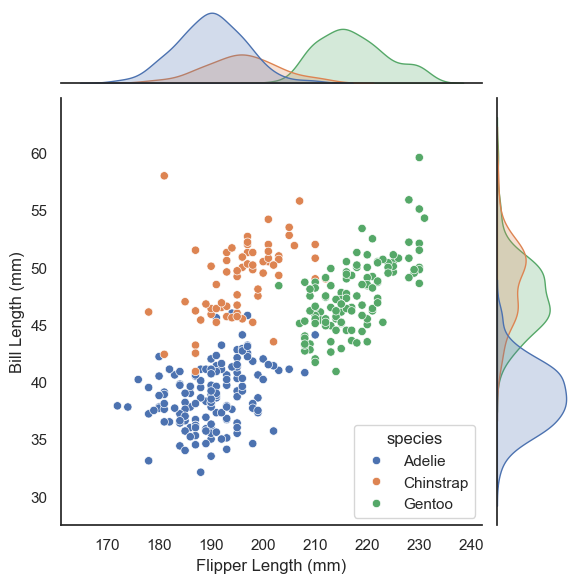

In [63]:
sns.set_style("white")

# Create the jointplot
ax = sns.jointplot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species",
    height=6
)

# Set axis labels
ax.set_axis_labels("Flipper Length (mm)", "Bill Length (mm)");

### Pairwise Plots - `pairplot()`

Seaborn’s `pairplot()` is a powerful tool for exploratory data analysis (EDA) when you want to quickly visualize relationships between multiple numerical variables in a dataset.

`pairplot()` is similar — it combines joint and marginal views — but rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously.

**Key Features**

- Quick visual summary of variable distributions and relationships.
- Ideal for initial exploration before deeper statistical modeling.
- Can reveal clusters, correlations, or potential outliers in multivariate data.

- Off-diagonal: scatterplots of every pair of variables.
- Diagonal: KDE curves of each variable’s distribution.
- Hue: points colored by species, allowing comparison between groups.

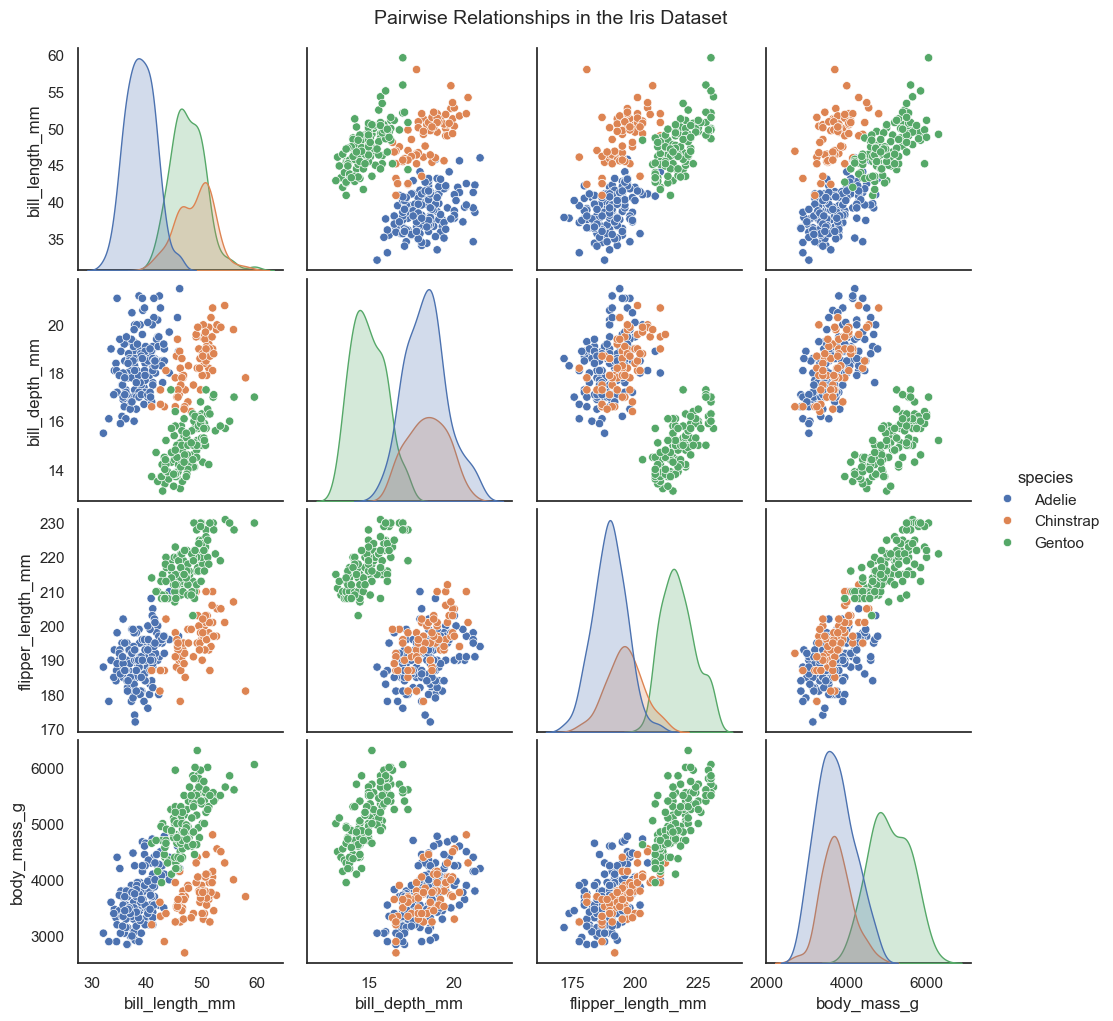

In [64]:
g = sns.pairplot(data=penguins, hue="species")

g.fig.suptitle("Pairwise Relationships in the Iris Dataset", fontsize=14, y=1.02);

### Pairwise Plots - `PairGrid()`

`PairGrid` is a flexible, figure-level object in Seaborn designed for visualizing pairwise relationships in a dataset. It is similar to `pairplot()`, but more customizable because you can control each part of the grid independently.

**Key Features**

1. Custom mapping of plots
    - With `map_diag()`, `map_upper()`, and `map_lower()`, you can assign different types of plots to different regions of the grid.
        - `map_diag()`  → plots along the diagonal (usually univariate distributions).
        - `map_upper()` → plots in the upper triangle.
        - `map_lower()` → plots in the lower triangle.

2. Fine control over aesthetics
    - Each axis or subset of the grid can have different plot types, markers, colors, or functions.
    - This allows you to mix scatterplots, KDEs, histograms, regression lines, or custom functions.

3. Figure-level customization
    - Since PairGrid returns a grid object, you can adjust axis labels, titles, legends, and spacing easily.

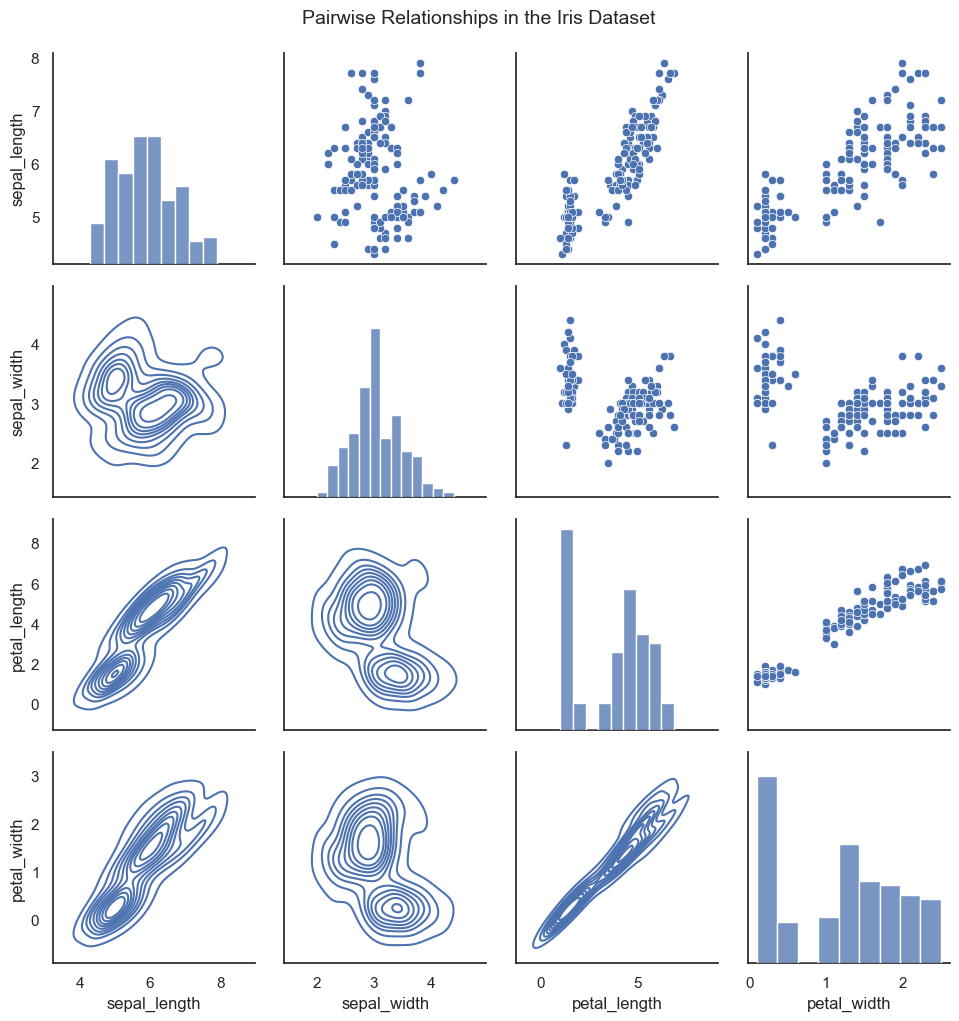

In [65]:
g = sns.PairGrid(iris)
g.map_diag(sns.histplot)          # diagonal: histograms of each variable
#g.map_offdiag(sns.scatterplot)   # optional: scatterplots everywhere
g.map_upper(sns.scatterplot)      # upper triangle: scatterplots
g.map_lower(sns.kdeplot)          # lower triangle: KDE plots of pairs

g.fig.suptitle("Pairwise Relationships in the Iris Dataset", fontsize=14, y=1.02);

1. `g = sns.PairGrid(iris)`
    - Initializes a grid of plots for all numeric variables in iris.
2. `g.map_diag(sns.histplot)`
    - Diagonal plots show distributions of each variable.
3. `g.map_upper(sns.scatterplot)`
    - Upper triangle shows scatterplots to visualize relationships between variable pairs.
4. `g.map_lower(sns.kdeplot)`
    - Lower triangle shows bivariate KDE plots, highlighting density and clustering between variable pairs.
5. `g.fig.suptitle(...)`
    - Adds a figure-level title, positioned above the grid.

### Split Violinplot

Seaborn’s `violinplot()` is a combination of a boxplot and a kernel density plot. It is used to visualize the distribution of a continuous variable across different categories. Unlike a simple boxplot, a violinplot shows the full distribution of the data, which helps identify multimodal patterns, skewness, or subtle differences between groups.

**Key Features**

1. Distribution shape
    - The violin shape represents the kernel density estimate of the data.
    - Wider sections indicate higher density of observations.

2. Optional inner summary
    - inner controls the summary shown inside the violin:
        - "box" → shows a mini boxplot
        - "quart" → shows quartiles
        - "point" → shows mean/median points

3. Hue for subgroups
    - You can separate each violin into subgroups using hue.
    - If split=True, the violins for each hue category are split in half for easier comparison.

4. Custom colors
    - palette allows mapping categorical values to specific colors.
    - fill=False or fill=True controls whether the violin is filled with color.

This creates a split violin plot comparing tip amounts (y) across days (x),
and distinguishing smokers vs. non-smokers (hue="smoker").

Each violin represents the distribution (density) of tip values (`y="tip"`) for that group (`x="day"`). 
`split=True` draws the two categories of smoker status (`hue="smoker"`) on the same violin, one on each side.

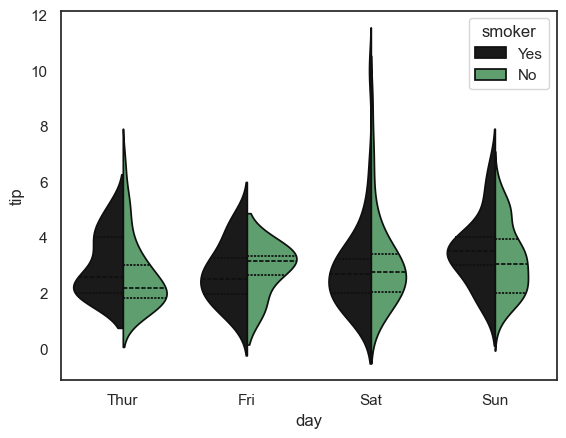

In [73]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x="day", y="tip", hue="smoker",
               split=True, inner="quart", fill=True,
               palette={"Yes": "k", "No": "g"});

In Seaborn, whenever you pass an argument that modifies appearance or layout (e.g., `split` and `palette`, it will usually be applied per `hue` level if `hue` is defined.

| Argument                          | Meaning                                            | Effect                                                                                      |
| --------------------------------- | -------------------------------------------------- | ------------------------------------------------------------------------------------------- |
| `hue="smoker"`                    | Second categorical variable                        | Splits each day’s data into **smokers vs. non-smokers**.                                    |
| `split=True`                      | Combine two hue groups in one violin               | Draws a **half-violin per hue** on each side of the centerline, allowing direct comparison. |
| `inner="quart"`                   | Show quartiles inside each violin                  | Adds lines for **25th, 50th (median), and 75th percentiles** inside the violin body.        |
| `fill=False`                      | Draws **unfilled outlines** instead of solid fills | Only violin edges are drawn (makes comparisons clearer).                                    |
| `palette={"Yes": "k", "No": "g"}` | Custom colors for hue levels                       | Smokers (`"Yes"`) = black (`"k`), Non-smokers (`"No"`) = green (`"g"`).                     |


What `inner=` does:

Each violin shows the distribution (a smoothed kernel density) of tip for each day and smoker group.
The inner argument adds summary markers or lines inside the violin to give more detail about the distribution’s internal structure.

Common `inner` options:

| Option    | Description                                                                 | Visual effect                             |
| --------- | --------------------------------------------------------------------------- | ----------------------------------------- |
| `"box"`   | Draws a mini **boxplot** inside each violin (shows median + IQR).           | Small box and whiskers inside the violin. |
| `"quart"` | Draws **horizontal lines** at the quartiles (25th, 50th, 75th percentiles). | Three thin lines inside the violin.       |
| `"point"` | Shows **individual summary points** (often the median).                     | Dots at key locations.                    |
| `"stick"` | Shows **vertical bars (sticks)** for each data point.                       | Looks like tick marks inside the violin.  |
| `None`    | Draws **nothing inside** — only the outer violin shape.                     | Just the distribution shape.              |


### Wrap Up

That's all for now.
- Please complete the DC course "Supervised Learning with scikit-learn" by noon on 10/20.
- Submit the in-class exercise notebook by 6:00 PM today.

BY PRINTING YOUR NAME BELOW, YOU CONFIRM THAT THE EXERCISES YOU SUBMITTED IN THIS NOTEBOOK ARE YOUR OWN AND THAT YOU DID NOT USE AI TO ASSIST WITH YOUR WORK.

In [ ]:
# PRINT YOUR NAME
print("Enter Your Name Here")